In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.linalg import matmul
from tensorflow import transpose
from tensorflow.math import log
from tensorflow.math import reduce_mean
from tensorflow.math import minimum
from tensorflow.math import maximum
from tensorflow.math import exp

**Create training data**

In [2]:
n_sample_blue = 80
n_sample_red = 50
n_sample = n_sample_red + n_sample_blue

x_center_blue = np.array([[-6], [9]])
x_center_red = np.array([[1], [2]])
x_blue = x_center_blue + np.random.normal(0, 2, size=(2, n_sample_blue))
x_red = x_center_red + np.random.normal(0, 2, size=(2, n_sample_red))
ones = np.ones(n_sample)
x = np.hstack((x_blue, x_red))
X = np.vstack((ones, x)).astype('float64')

Y = np.hstack((np.ones(n_sample_blue), np.zeros(n_sample_red))).astype('float64')

print("X.shape:", X.shape)
print("Y.shape:", Y.shape)

X.shape: (3, 130)
Y.shape: (130,)


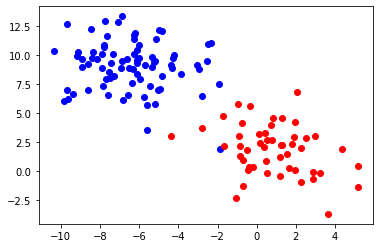

In [3]:
# Use the below line in Jupyter Notebook to view the plot inside notebook, it doesn't work in Google Colab
%matplotlib inline
plt.plot(x_blue[0][:], x_blue[1][:], 'bo')
plt.plot(x_red[0][:], x_red[1][:], 'ro')
# Or
# plt.plot(X[1][:n_sample_blue], X[2][:n_sample_blue], 'bo')
# plt.plot(X[1][n_sample_blue:], X[2][n_sample_blue:], 'ro')
plt.show()

**Set value:** theta<br>
**Define:** loss function<br>
**Note:** Do not define the derivative of the loss function because tensorflow will take the derivative by itself

In [4]:
"""
This function is used to prevent sigmoid returns 1 and 0, these two numbers make a log(0) return infinity value, which makes
TensorFlow can not update theta. So we have to set boundaries for sigmoid value.
"""
def sigmoid(x):
    sig = 1 / (1 + exp(-x))     # Define sigmoid function
    sig = minimum(sig, 0.9999999999999999)  # Set upper bound
    sig = maximum(sig, 0.0000000000000001)  # Set lower bound
    return sig

In [5]:
theta = tf.Variable(np.array([[2.0], [-6.0], [7.0]], dtype=np.float64))
epsilon = 0.001

# Y_ = sigmoid(matmul(transpose(theta), X))
# a = Y * log(Y_) + (1- Y)*log(1 - Y_)
# loss = - reduce_mean(a)
@tf.function
def Loss(theta):
    Y_ = sigmoid(matmul(transpose(theta), X))
    return - reduce_mean(Y * log(Y_) + (1-Y)*log(1-Y_))

In [6]:
Loss(theta)

<tf.Tensor: shape=(), dtype=float64, numpy=5.16792357774293>

**Loop:**<br>
<span style="margin-left:2em">Update theta</span><br>

In [6]:
# Use the below line in Jupyter Notebook to view the plot with interactive window, it doesn't work in Google Colab
%matplotlib qt
# Set limits for 2 axises so that the plot keeps drawing only in a certain space
plt.xlim(-15, 8)
plt.ylim(-10, 15)

plt.plot(x_blue[0][:], x_blue[1][:], 'bo')
plt.plot(x_red[0][:], x_red[1][:], 'ro')

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
count_epoch = 1
epoch = 1000
while True:
    # Calculate loss
    with tf.GradientTape() as tape:
        loss = Loss(theta)
        
    # Draw a line using theta to see how the algorithm is doing
    x_vis = np.array([[-15], [15]])  # vis stand for visualize
    y_vis = -(theta[1][0]*x_vis + theta[0][0]) / theta[2][0]
    plt.plot(x_vis, y_vis)
    plt.pause(0.0001)

    # Update theta
    grads = tape.gradient(loss, [theta])
    opt.apply_gradients(zip(grads, [theta]))
    print("Epoch: %d Loss: %.8f   Theta_2_1_0: %.8f %.8f %.8f" %(count_epoch, loss.numpy(), theta[2][0], theta[1][0], theta[0][0]))

    # Stopping condition
    # Check if all values in loss is less than epsilon
    # It will probably take a long time to satisfy the above condition, so we will have to use epoch
    if tf.experimental.numpy.all((tf.math.abs(grads) < epsilon)) or count_epoch == epoch:
        break
    count_epoch += 1

Epoch: 1 Loss: 5.38608334   Theta_2_1_0: 6.93311478 -6.01987621 1.97563716
Epoch: 2 Loss: 5.33075321   Theta_2_1_0: 6.86689215 -6.03954343 1.95148033
Epoch: 3 Loss: 5.27665873   Theta_2_1_0: 6.80109914 -6.05900077 1.92748157
Epoch: 4 Loss: 5.22422696   Theta_2_1_0: 6.73532356 -6.07815652 1.90353731
Epoch: 5 Loss: 5.17157578   Theta_2_1_0: 6.66980084 -6.09702472 1.87970241
Epoch: 6 Loss: 5.11947936   Theta_2_1_0: 6.60448649 -6.11561560 1.85597712
Epoch: 7 Loss: 5.06787316   Theta_2_1_0: 6.53941515 -6.13387836 1.83236437
Epoch: 8 Loss: 5.01709295   Theta_2_1_0: 6.47444988 -6.15179449 1.80883892
Epoch: 9 Loss: 4.95570066   Theta_2_1_0: 6.40530189 -6.16870082 1.78449297
Epoch: 10 Loss: 4.90225865   Theta_2_1_0: 6.33452429 -6.18522305 1.75992713
Epoch: 11 Loss: 4.84302707   Theta_2_1_0: 6.26469292 -6.20096180 1.73555553
Epoch: 12 Loss: 4.78723170   Theta_2_1_0: 6.19448726 -6.21597412 1.71113922
Epoch: 13 Loss: 4.73257124   Theta_2_1_0: 6.12322798 -6.23023154 1.68654404
Epoch: 14 Loss: 4.664

Epoch: 114 Loss: 0.76766276   Theta_2_1_0: 0.33855940 -6.04404683 -0.15766757
Epoch: 115 Loss: 0.75781017   Theta_2_1_0: 0.31078082 -6.03349837 -0.16686899
Epoch: 116 Loss: 0.74818933   Theta_2_1_0: 0.28337464 -6.02291352 -0.17596934
Epoch: 117 Loss: 0.73878009   Theta_2_1_0: 0.25631290 -6.01229607 -0.18497483
Epoch: 118 Loss: 0.72956453   Theta_2_1_0: 0.22957026 -6.00164949 -0.19389110
Epoch: 119 Loss: 0.72052674   Theta_2_1_0: 0.20312389 -5.99097691 -0.20272326
Epoch: 120 Loss: 0.71165262   Theta_2_1_0: 0.17695326 -5.98028118 -0.21147595
Epoch: 121 Loss: 0.70292971   Theta_2_1_0: 0.15103994 -5.96956489 -0.22015333
Epoch: 122 Loss: 0.69434697   Theta_2_1_0: 0.12536746 -5.95883037 -0.22875915
Epoch: 123 Loss: 0.68589466   Theta_2_1_0: 0.09992112 -5.94807977 -0.23729681
Epoch: 124 Loss: 0.67756417   Theta_2_1_0: 0.07468778 -5.93731501 -0.24576936
Epoch: 125 Loss: 0.66934789   Theta_2_1_0: 0.04965577 -5.92653788 -0.25417955
Epoch: 126 Loss: 0.66123910   Theta_2_1_0: 0.02481471 -5.9157499

Epoch: 219 Loss: 0.38711365   Theta_2_1_0: -0.76875907 -5.09549783 -0.81190536
Epoch: 220 Loss: 0.38633270   Theta_2_1_0: -0.76731755 -5.08814134 -0.81658142
Epoch: 221 Loss: 0.38555219   Theta_2_1_0: -0.76586177 -5.08078861 -0.82125426
Epoch: 222 Loss: 0.38477213   Theta_2_1_0: -0.76439258 -5.07343952 -0.82592395
Epoch: 223 Loss: 0.38399250   Theta_2_1_0: -0.76291077 -5.06609395 -0.83059059
Epoch: 224 Loss: 0.38321330   Theta_2_1_0: -0.76141711 -5.05875180 -0.83525424
Epoch: 225 Loss: 0.38243453   Theta_2_1_0: -0.75991229 -5.05141297 -0.83991498
Epoch: 226 Loss: 0.38165618   Theta_2_1_0: -0.75839698 -5.04407736 -0.84457287
Epoch: 227 Loss: 0.38087825   Theta_2_1_0: -0.75687181 -5.03674490 -0.84922799
Epoch: 228 Loss: 0.38010075   Theta_2_1_0: -0.75533736 -5.02941549 -0.85388039
Epoch: 229 Loss: 0.37932365   Theta_2_1_0: -0.75379419 -5.02208907 -0.85853012
Epoch: 230 Loss: 0.37854698   Theta_2_1_0: -0.75224282 -5.01476556 -0.86317724
Epoch: 231 Loss: 0.37777072   Theta_2_1_0: -0.750683

Epoch: 325 Loss: 0.30693116   Theta_2_1_0: -0.59472998 -4.32995682 -1.29462289
Epoch: 326 Loss: 0.30620435   Theta_2_1_0: -0.59305362 -4.32287275 -1.29905419
Epoch: 327 Loss: 0.30547821   Theta_2_1_0: -0.59137734 -4.31579176 -1.30348289
Epoch: 328 Loss: 0.30475275   Theta_2_1_0: -0.58970115 -4.30871387 -1.30790899
Epoch: 329 Loss: 0.30402795   Theta_2_1_0: -0.58802505 -4.30163909 -1.31233246
Epoch: 330 Loss: 0.30330383   Theta_2_1_0: -0.58634904 -4.29456744 -1.31675331
Epoch: 331 Loss: 0.30258039   Theta_2_1_0: -0.58467314 -4.28749895 -1.32117151
Epoch: 332 Loss: 0.30185763   Theta_2_1_0: -0.58299734 -4.28043362 -1.32558706
Epoch: 333 Loss: 0.30113556   Theta_2_1_0: -0.58132165 -4.27337148 -1.32999993
Epoch: 334 Loss: 0.30041418   Theta_2_1_0: -0.57964607 -4.26631256 -1.33441013
Epoch: 335 Loss: 0.29969350   Theta_2_1_0: -0.57797060 -4.25925686 -1.33881764
Epoch: 336 Loss: 0.29897351   Theta_2_1_0: -0.57629525 -4.25220441 -1.34322244
Epoch: 337 Loss: 0.29825423   Theta_2_1_0: -0.574620

Epoch: 430 Loss: 0.23495359   Theta_2_1_0: -0.41991234 -3.60683704 -1.74328903
Epoch: 431 Loss: 0.23431736   Theta_2_1_0: -0.41826727 -3.60019321 -1.74737513
Epoch: 432 Loss: 0.23368220   Theta_2_1_0: -0.41662275 -3.59355483 -1.75145721
Epoch: 433 Loss: 0.23304811   Theta_2_1_0: -0.41497879 -3.58692191 -1.75553525
Epoch: 434 Loss: 0.23241509   Theta_2_1_0: -0.41333539 -3.58029449 -1.75960924
Epoch: 435 Loss: 0.23178315   Theta_2_1_0: -0.41169257 -3.57367259 -1.76367916
Epoch: 436 Loss: 0.23115229   Theta_2_1_0: -0.41005032 -3.56705623 -1.76774501
Epoch: 437 Loss: 0.23052252   Theta_2_1_0: -0.40840865 -3.56044544 -1.77180676
Epoch: 438 Loss: 0.22989384   Theta_2_1_0: -0.40676756 -3.55384024 -1.77586440
Epoch: 439 Loss: 0.22926625   Theta_2_1_0: -0.40512707 -3.54724066 -1.77991792
Epoch: 440 Loss: 0.22863976   Theta_2_1_0: -0.40348718 -3.54064672 -1.78396731
Epoch: 441 Loss: 0.22801437   Theta_2_1_0: -0.40184788 -3.53405846 -1.78801256
Epoch: 442 Loss: 0.22739008   Theta_2_1_0: -0.400209

Epoch: 534 Loss: 0.17508909   Theta_2_1_0: -0.25283239 -2.94953446 -2.14451722
Epoch: 535 Loss: 0.17458004   Theta_2_1_0: -0.25127569 -2.94358767 -2.14812507
Epoch: 536 Loss: 0.17407234   Theta_2_1_0: -0.24972015 -2.93764879 -2.15172790
Epoch: 537 Loss: 0.17356597   Theta_2_1_0: -0.24816575 -2.93171785 -2.15532573
Epoch: 538 Loss: 0.17306094   Theta_2_1_0: -0.24661252 -2.92579486 -2.15891854
Epoch: 539 Loss: 0.17255725   Theta_2_1_0: -0.24506046 -2.91987984 -2.16250633
Epoch: 540 Loss: 0.17205489   Theta_2_1_0: -0.24350956 -2.91397282 -2.16608910
Epoch: 541 Loss: 0.17155389   Theta_2_1_0: -0.24195985 -2.90807381 -2.16966684
Epoch: 542 Loss: 0.17105422   Theta_2_1_0: -0.24041132 -2.90218284 -2.17323956
Epoch: 543 Loss: 0.17055590   Theta_2_1_0: -0.23886397 -2.89629993 -2.17680724
Epoch: 544 Loss: 0.17005892   Theta_2_1_0: -0.23731782 -2.89042509 -2.18036989
Epoch: 545 Loss: 0.16956329   Theta_2_1_0: -0.23577287 -2.88455835 -2.18392750
Epoch: 546 Loss: 0.16906901   Theta_2_1_0: -0.234229

Epoch: 640 Loss: 0.12864976   Theta_2_1_0: -0.09518663 -2.36683525 -2.49894423
Epoch: 641 Loss: 0.12828344   Theta_2_1_0: -0.09377871 -2.36182779 -2.50202279
Epoch: 642 Loss: 0.12791842   Theta_2_1_0: -0.09237242 -2.35682999 -2.50509657
Epoch: 643 Loss: 0.12755471   Theta_2_1_0: -0.09096775 -2.35184189 -2.50816557
Epoch: 644 Loss: 0.12719231   Theta_2_1_0: -0.08956472 -2.34686348 -2.51122981
Epoch: 645 Loss: 0.12683121   Theta_2_1_0: -0.08816333 -2.34189479 -2.51428929
Epoch: 646 Loss: 0.12647141   Theta_2_1_0: -0.08676357 -2.33693582 -2.51734401
Epoch: 647 Loss: 0.12611291   Theta_2_1_0: -0.08536546 -2.33198658 -2.52039399
Epoch: 648 Loss: 0.12575572   Theta_2_1_0: -0.08396900 -2.32704709 -2.52343924
Epoch: 649 Loss: 0.12539982   Theta_2_1_0: -0.08257419 -2.32211736 -2.52647975
Epoch: 650 Loss: 0.12504522   Theta_2_1_0: -0.08118103 -2.31719739 -2.52951554
Epoch: 651 Loss: 0.12469191   Theta_2_1_0: -0.07978953 -2.31228721 -2.53254662
Epoch: 652 Loss: 0.12433990   Theta_2_1_0: -0.078399

Epoch: 746 Loss: 0.09673724   Theta_2_1_0: 0.04438733 -1.89183152 -2.80032370
Epoch: 747 Loss: 0.09649840   Theta_2_1_0: 0.04560568 -1.88790141 -2.80294547
Epoch: 748 Loss: 0.09626063   Theta_2_1_0: 0.04682209 -1.88398180 -2.80556348
Epoch: 749 Loss: 0.09602393   Theta_2_1_0: 0.04803656 -1.88007268 -2.80817774
Epoch: 750 Loss: 0.09578829   Theta_2_1_0: 0.04924910 -1.87617406 -2.81078827
Epoch: 751 Loss: 0.09555371   Theta_2_1_0: 0.05045969 -1.87228593 -2.81339507
Epoch: 752 Loss: 0.09532019   Theta_2_1_0: 0.05166834 -1.86840831 -2.81599815
Epoch: 753 Loss: 0.09508773   Theta_2_1_0: 0.05287504 -1.86454118 -2.81859754
Epoch: 754 Loss: 0.09485631   Theta_2_1_0: 0.05407980 -1.86068456 -2.82119323
Epoch: 755 Loss: 0.09462595   Theta_2_1_0: 0.05528260 -1.85683845 -2.82378524
Epoch: 756 Loss: 0.09439663   Theta_2_1_0: 0.05648346 -1.85300284 -2.82637358
Epoch: 757 Loss: 0.09416836   Theta_2_1_0: 0.05768235 -1.84917774 -2.82895826
Epoch: 758 Loss: 0.09394112   Theta_2_1_0: 0.05887929 -1.8453631

Epoch: 852 Loss: 0.07678304   Theta_2_1_0: 0.16236308 -1.53351270 -3.05944636
Epoch: 853 Loss: 0.07664031   Theta_2_1_0: 0.16336541 -1.53068529 -3.06173078
Epoch: 854 Loss: 0.07649832   Theta_2_1_0: 0.16436563 -1.52786795 -3.06401257
Epoch: 855 Loss: 0.07635706   Theta_2_1_0: 0.16536374 -1.52506067 -3.06629175
Epoch: 856 Loss: 0.07621652   Theta_2_1_0: 0.16635973 -1.52226344 -3.06856834
Epoch: 857 Loss: 0.07607671   Theta_2_1_0: 0.16735360 -1.51947625 -3.07084233
Epoch: 858 Loss: 0.07593762   Theta_2_1_0: 0.16834536 -1.51669909 -3.07311374
Epoch: 859 Loss: 0.07579924   Theta_2_1_0: 0.16933500 -1.51393195 -3.07538258
Epoch: 860 Loss: 0.07566158   Theta_2_1_0: 0.17032253 -1.51117481 -3.07764886
Epoch: 861 Loss: 0.07552462   Theta_2_1_0: 0.17130793 -1.50842766 -3.07991259
Epoch: 862 Loss: 0.07538838   Theta_2_1_0: 0.17229122 -1.50569050 -3.08217377
Epoch: 863 Loss: 0.07525283   Theta_2_1_0: 0.17327239 -1.50296331 -3.08443243
Epoch: 864 Loss: 0.07511799   Theta_2_1_0: 0.17425145 -1.5002460

Epoch: 958 Loss: 0.06511478   Theta_2_1_0: 0.25686312 -1.28714737 -3.28872902
Epoch: 959 Loss: 0.06503219   Theta_2_1_0: 0.25764336 -1.28530377 -3.29078340
Epoch: 960 Loss: 0.06495001   Theta_2_1_0: 0.25842157 -1.28346845 -3.29283600
Epoch: 961 Loss: 0.06486824   Theta_2_1_0: 0.25919778 -1.28164138 -3.29488682
Epoch: 962 Loss: 0.06478688   Theta_2_1_0: 0.25997197 -1.27982254 -3.29693587
Epoch: 963 Loss: 0.06470592   Theta_2_1_0: 0.26074415 -1.27801191 -3.29898316
Epoch: 964 Loss: 0.06462536   Theta_2_1_0: 0.26151432 -1.27620946 -3.30102869
Epoch: 965 Loss: 0.06454520   Theta_2_1_0: 0.26228249 -1.27441518 -3.30307247
Epoch: 966 Loss: 0.06446543   Theta_2_1_0: 0.26304865 -1.27262904 -3.30511450
Epoch: 967 Loss: 0.06438605   Theta_2_1_0: 0.26381282 -1.27085102 -3.30715479
Epoch: 968 Loss: 0.06430707   Theta_2_1_0: 0.26457499 -1.26908109 -3.30919335
Epoch: 969 Loss: 0.06422847   Theta_2_1_0: 0.26533517 -1.26731924 -3.31123018
Epoch: 970 Loss: 0.06415026   Theta_2_1_0: 0.26609336 -1.2655654

**Result:** theta after running Losgistic Regression

In [7]:
print(f"Current optimal value of theta_0: {theta[0][0]}")
print(f"Current optimal value of theta_1: {theta[1][0]}")
print(f"Current optimal value of theta_1: {theta[2][0]}")

Current optimal value of theta_0: -3.3735432143021264
Current optimal value of theta_1: -1.2165817294860075
Current optimal value of theta_1: 0.28792856671370876
